In [1]:
import pandas as pd 
import re 
import nltk
import nltk
nltk.download('punkt')
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer

import pickle

import json
import random
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


##  Reading the raw text data

In [8]:
#news= open('en_US/en_US.news.txt',encoding="utf8").read()
blogs= open('/content/sample_data/text_blogs.txt',encoding="utf8").read()
twitter= open('/content/sample_data/text_twt.txt',encoding="utf8").read()

In [9]:
#print(len(news))
print(len(blogs))
print(len(twitter))

207723793
164456396


- Merging the news and blog data 
- Keeping the twitter data separate

In [10]:
text_corpus1=blogs 
print(len(text_corpus1))

207723793


## Cleaning

- Removing Extra space
- Removing Special Characters
- Tokenizing text data
- Tokenizing Twitter data

In [11]:
def extra_space(text):
    new_text= re.sub("\s+"," ",text)
    return new_text
def sp_charac(text):
    new_text=re.sub("[^0-9A-Za-z ]", "" , text)
    return new_text
def tokenize_text(text):
    new_text=word_tokenize(text)
    return new_text
def tokenize_twitter(text):
    tweet = TweetTokenizer()
    new_text=tweet.tokenize(text)
    return new_text


In [16]:
cleaned_text=extra_space(text_corpus1)
cleaned_twitter=extra_space(twitter)
print("Removed Extra Spaces")
cleaned_text=sp_charac(cleaned_text)
cleaned_twitter=sp_charac(cleaned_twitter)
print("Removed Special Caracters")
cleaned_text=tokenize_text(cleaned_text)
cleaned_twitter=tokenize_twitter(cleaned_twitter)
print("Tokenized data")

Removed Extra Spaces
Removed Special Caracters
Tokenized data


In [2]:

with open("/content/sample_data/Clean_Data/cleaned_text.txt", "rb") as fp:   # Unpickling
    cleaned_text = pickle.load(fp)
with open("/content/sample_data/Clean_Data/cleaned_twitter.txt", "rb") as fp:   # Unpickling
    cleaned_twitter = pickle.load(fp)
cleaned_corpus=cleaned_text+cleaned_twitter
print(len(cleaned_corpus))

66904096


In [3]:

def create_data(length):
    seq=[]
    start=random.randint(0, len(cleaned_corpus)//2) # Used half of the corpus due to memory error
    for i in range(length,len(cleaned_corpus)//2):
        words = cleaned_corpus[i-length+start:i+start]
        line = ' '.join(words)
        seq.append(line)
        if i % 2000000==0:
            print(i , 'tokens done')
    with open('len'+str(length)+'.json', 'w') as fp:
        json.dump(seq, fp)
    
    del seq
    

In [4]:
#Sequence of length 2
create_data(2)

2000000 tokens done
4000000 tokens done
6000000 tokens done
8000000 tokens done
10000000 tokens done
12000000 tokens done
14000000 tokens done
16000000 tokens done
18000000 tokens done
20000000 tokens done
22000000 tokens done
24000000 tokens done
26000000 tokens done
28000000 tokens done
30000000 tokens done
32000000 tokens done


In [5]:
#Sequence of length 4
create_data(4)

2000000 tokens done
4000000 tokens done
6000000 tokens done
8000000 tokens done
10000000 tokens done
12000000 tokens done
14000000 tokens done
16000000 tokens done
18000000 tokens done
20000000 tokens done
22000000 tokens done
24000000 tokens done
26000000 tokens done
28000000 tokens done
30000000 tokens done
32000000 tokens done


In [6]:
#Sequence of length 7
create_data(7)

2000000 tokens done
4000000 tokens done
6000000 tokens done
8000000 tokens done
10000000 tokens done
12000000 tokens done
14000000 tokens done
16000000 tokens done
18000000 tokens done
20000000 tokens done
22000000 tokens done
24000000 tokens done
26000000 tokens done
28000000 tokens done
30000000 tokens done
32000000 tokens done


### Encoding Data and splitting it into x and y

In [7]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
import pickle
import numpy as np
def encoding_data(length):
    with open('len'+str(length)+'.json', 'r') as fp:
        seq=json.load( fp)
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(seq[:100000])
    
    sequences = tokenizer.texts_to_sequences(seq[:100000])
    
    sequences=np.array(sequences)
    vocab=len(tokenizer.word_counts)+1
    data_x=sequences[:,:-1]
    data_y=sequences[:,-1]
    data_y = to_categorical(data_y, num_classes=vocab)
    words_to_index = tokenizer.word_index
    with open('tokenizer_len'+str(length)+'.pickle', 'wb') as handle:
        pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
    del seq
    return data_x,data_y,vocab,words_to_index

In [8]:
'''
#x,y,v=encoding_data(2)
import numpy as np 
embeddings_index=np.load('embeddings_index.npy',allow_pickle=True)
embeddings_index=dict(enumerate(embeddings_index.flatten(), 1))
'''

"\n#x,y,v=encoding_data(2)\nimport numpy as np \nembeddings_index=np.load('embeddings_index.npy',allow_pickle=True)\nembeddings_index=dict(enumerate(embeddings_index.flatten(), 1))\n"

In [9]:
'''
embeddings_index = dict()
f = open('glove.42B.300d.txt',encoding='UTF-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

import numpy as np
np.save('embeddings_index.npy',embeddings_index)
'''

"\nembeddings_index = dict()\nf = open('glove.42B.300d.txt',encoding='UTF-8')\nfor line in f:\n    values = line.split()\n    word = values[0]\n    coefs = np.asarray(values[1:], dtype='float32')\n    embeddings_index[word] = coefs\nf.close()\nprint('Loaded %s word vectors.' % len(embeddings_index))\n\nimport numpy as np\nnp.save('embeddings_index.npy',embeddings_index)\n"

In [10]:
'''
def embedding(vocab_size,wti):
    embedding_matrix = np.zeros((vocab_size, 300))
    for word, i in wti.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
    return embedding_matrix
'''

'\ndef embedding(vocab_size,wti):\n    embedding_matrix = np.zeros((vocab_size, 300))\n    for word, i in wti.items():\n        embedding_vector = embeddings_index.get(word)\n        if embedding_vector is not None:\n            embedding_matrix[i] = embedding_vector\n    return embedding_matrix\n'

In [11]:
#Attention Model for classification 
#Code Reference below:
#https://www.analyticsvidhya.com/blog/2019/11/comprehensive-guide-attention-mechanism-deep-learning/#:~:text=Let's%20not%20implement%20a%20simple,Keras%20custom%20layer%20generation%20rule.
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Layer
class attention(Layer):
    def init(self):
        super(attention,self).__init__()
    def build(self,input_shape):
        self.W=self.add_weight(name='att_weight',shape=(input_shape[-1],1),initializer="normal")
        self.b=self.add_weight(name='att_bias',shape=(input_shape[-2],1),initializer="zeros")        
        super(attention, self).build(input_shape)
    def call(self,x):
        e = K.tanh(K.dot(x,self.W)+self.b)
        a = K.softmax(e, axis=1)
        output = x*a
        return K.sum(output, axis=1)

### Preparing the LSTM models

In [12]:
def lstm_model(length,unit1,n):
    import matplotlib.pyplot as plt
    from tensorflow.keras.regularizers import l2
    from tensorflow.keras.layers import LSTM, Activation, Dropout, Dense, Input,Embedding,Bidirectional
    from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,LearningRateScheduler,EarlyStopping
    from tensorflow.keras.models import Model,Sequential,save_model
    from tensorflow.keras.optimizers import Adam
    # Calling the encoding function to get the data of specified length and the vocabulary
    data_x,data_y,v,wti=encoding_data(length) 
    print("Data Encoded")
    print("Data_x",data_x[:5])
    print("Data_y",data_y[:5])
    print("Vocab_Size",v)
   
    # Preparing the model based on the inputs of unit1 ,unit2 and vocab values 
    model = Sequential()
    #model.add(Embedding(input_dim=v, output_dim=300 , input_length=length-1, weights = [embed_matrix], trainable=False))
    model.add(Embedding(v, length-1, input_length=length-1))
    model.add(Bidirectional(LSTM(unit1, return_sequences=True)))
    model.add(attention())
    #model.add(Dropout(0.5))
    #model.add(Dense(50, activation='relu'))
    model.add(Dense(v, activation='softmax'))
    print(model.summary())
    model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])
    filepath="lstmatt_len"+str(length)+".hdf5"
    checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
    '''
    def scheduler(epoch):
        
        if epoch < 60:
            return 0.001
        elif epoch < 100:
            return 0.0005
        else:
            return 0.0001
    '''
    #lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,patience=3, min_lr=0.0001,min_delta=0.5,verbose=1)
    #es = EarlyStopping(monitor='val_loss', patience=5,min_delta=0.1,verbose=1)
    callbacks_list = [checkpoint]
    # fit model with epochs 130 
    
    history=model.fit(data_x, data_y,batch_size=128, epochs=n,callbacks=callbacks_list)
    
    del data_x,data_y,v,wti
    
    # Plotting the loss and accuracy achieved by the model in each epoch
    fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(20,10))
    ax[0].plot(history.history['loss'])
    ax[1].plot(history.history['accuracy'])
    ax[0].set_title('model loss')
    ax[1].set_title('model Accuracy')
    ax[0].set_ylabel('loss')
    ax[0].set_xlabel('epoch')
    ax[1].set_ylabel('accuracy')
    ax[1].set_xlabel('epoch')
    fig.tight_layout(pad=10.0)
    plt.show()

In [ ]:
#Here the history is of length 1 ,Bidirectional LSTM layer has 300 units and LSTM layer has 100 units
lstm_model(2,32,60)

Data Encoded
Data_x [[  408  1056 16260]
 [ 1056 16260    12]
 [16260    12     6]
 [   12     6     4]
 [    6     4   499]]
Data_y [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Vocab_Size 16262
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 3, 3)              48786     
_________________________________________________________________
bidirectional (Bidirectional (None, 3, 128)            34816     
_________________________________________________________________
attention (attention)        (None, 128)               131       
_________________________________________________________________
dense (Dense)                (None, 16262)             2097798   
Total params: 2,181,531
Trainable params: 2,181,531
Non-trainable params: 0
__________________________________

625/625 [==============================] - 160s 256ms/step - loss: 3.6976 - accuracy: 0.2934 - val_loss: 10.0158 - val_accuracy: 0.0715

Epoch 00067: loss improved from 3.79653 to 3.77299, saving model to lstmatt_len4.hdf5
Epoch 68/80
625/625 [==============================] - 174s 278ms/step - loss: 3.6680 - accuracy: 0.2992 - val_loss: 10.0393 - val_accuracy: 0.0737

Epoch 00068: loss improved from 3.77299 to 3.74981, saving model to lstmatt_len4.hdf5
Epoch 69/80
625/625 [==============================] - 156s 249ms/step - loss: 3.6443 - accuracy: 0.3022 - val_loss: 10.0505 - val_accuracy: 0.0715

Epoch 00069: loss improved from 3.74981 to 3.72796, saving model to lstmatt_len4.hdf5
Epoch 70/80
625/625 [==============================] - 212s 339ms/step - loss: 3.6317 - accuracy: 0.3047 - val_loss: 10.0796 - val_accuracy: 0.0728

Epoch 00070: loss improved from 3.72796 to 3.70595, saving model to lstmatt_len4.hdf5
Epoch 71/80
625/625 [==============================] - 195s 313ms/step -

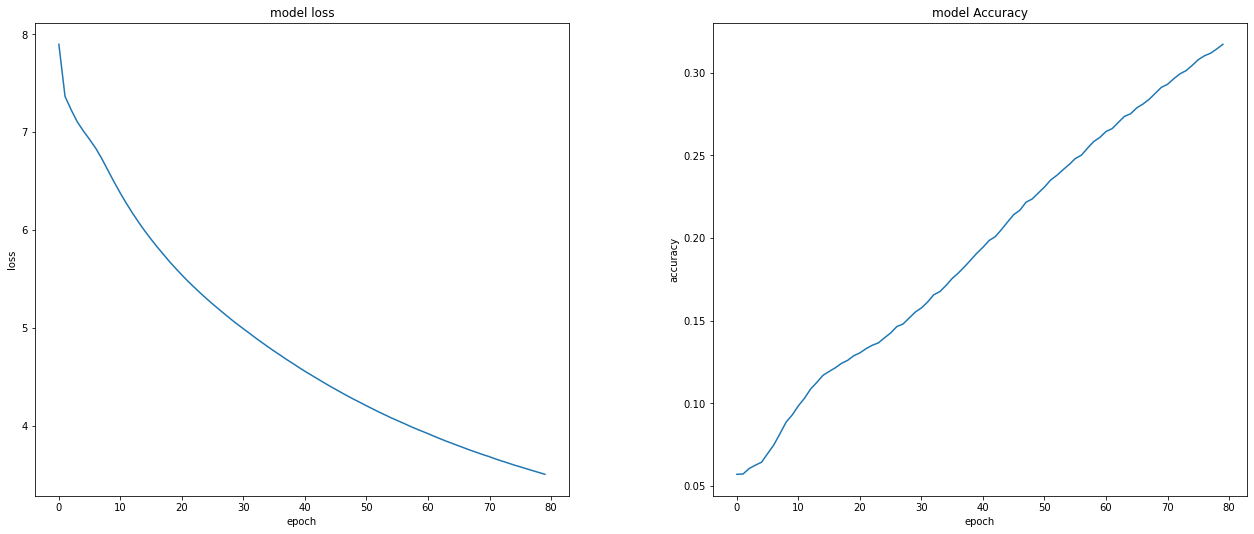

In [ ]:
#Here the history is of length 3 ,Bidirectional LSTM layer has 250 units and LSTM layer has 100 units
lstm_model(4,64,80)

Data Encoded
Data_x [[    8    87 16394  3393    55     2]
 [   87 16394  3393    55     2   130]
 [16394  3393    55     2   130     4]
 [ 3393    55     2   130     4  1313]
 [   55     2   130     4  1313     8]]
Data_y [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Vocab_Size 16395
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 6, 6)              98370     
_________________________________________________________________
bidirectional (Bidirectional (None, 6, 128)            36352     
_________________________________________________________________
attention (attention)        (None, 128)               134       
_________________________________________________________________
dense (Dense)                (None, 16395)             2114955   
Total params: 2,249,

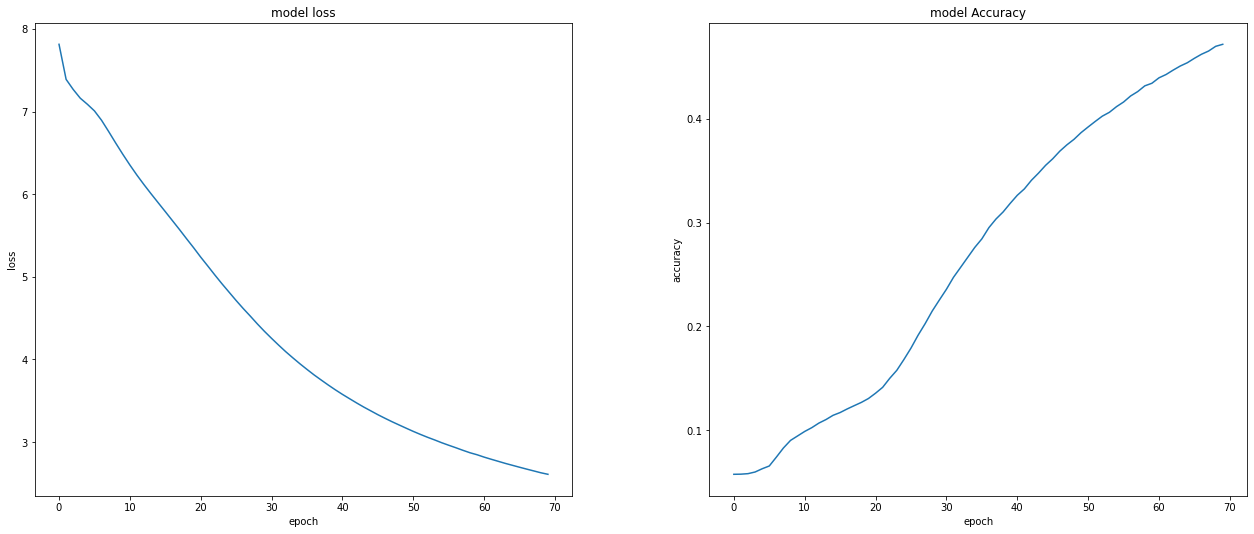

In [ ]:
#Here the history is of length 6 ,Bidirectional LSTM layer has 150 units and LSTM layer has 50 units
lstm_model(7,64,70)

### Creating test data to test the models

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
import pickle
import numpy as np

from tensorflow.keras.preprocessing.sequence import pad_sequences
'''
start - random integer that indicates the starting index of tokens in the test data
temp_length - length of each line in the test corpus from which test data will be created
length - length of history + next word in the test data
'''
def create_testdata2(start,temp_length,length):
    seq=[]
    
    for i in range(temp_length,50000):
        words = cleaned_corpus[i-temp_length+start:i+start]
        line = ' '.join(words)
        seq.append(line)
        if i % 10000==0:
            print(i , 'tokens done')
    with open('tokenizer_len'+str(length)+'.pickle', 'rb') as handle:
        tokenizer = pickle.load(handle)
    
    
    sequences = tokenizer.texts_to_sequences(seq)
    sequences = pad_sequences(sequences, maxlen=length, truncating='pre')
    sequences=np.array(sequences)
    
    vocab=len(tokenizer.word_counts)+1
    print(vocab)
    data_x=sequences[:,:-1]
    data_y=sequences[:,-1]
    data_y = to_categorical(data_y, num_classes=vocab)
    del seq,sequences
    return data_x,data_y
    

In [ ]:
#Function for generation data for error analysis
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
import pickle
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.sequence import pad_sequences
'''
start - random integer that indicates the starting index of tokens in the test data
temp_length - length of each line in the test corpus from which test data will be created
length - length of history + next word in the test data
'''
def create_errordata(start,temp_length,length):
    seq=[]
    
    for i in range(temp_length,100):
        words = cleaned_corpus[i-temp_length+start:i+start]
        line = ' '.join(words)
        seq.append(line)
        
    with open('tokenizer_len'+str(length)+'.pickle', 'rb') as handle:
        tokenizer = pickle.load(handle)
    
    
    sequences = tokenizer.texts_to_sequences(seq)
    sequences = pad_sequences(sequences, maxlen=length, truncating='pre')
    sequences=np.array(sequences)
    
    vocab=len(tokenizer.word_counts)+1
    print(vocab)
    data_x=sequences[:,:-1]
    data_y=sequences[:,-1]
    data_y = to_categorical(data_y, num_classes=vocab)
    del seq,sequences
    return data_x,data_y
    

In [ ]:
###Error Analysis funtion
def error_analysis(model,x,y,length):
    pred_y=model.predict(x)
    error=np.zeros(len(y))
    for i in range(len(pred_y)):
        for j in range(len(pred_y[i])):
            error[i] += -y[i][j]*np.log(pred_y[i][j])
            
      
    with open('tokenizer_len'+str(length)+'.pickle', 'rb') as handle:
        tokenizer = pickle.load(handle)
    x_words=tokenizer.sequences_to_texts(x)
    
    error_df =pd.DataFrame({'x':x_words, 'error':error})
    error_df=error_df.sort_values(by='error',ascending=False)
    return error_df

In [ ]:
#This function draws some plots using the input text of worst and best predicted data points.
def eda_on_error(error_df):
    from collections import Counter
    import seaborn as sns
    error_df['x']=error_df['x'].astype('str')
    worst_predicted=error_df.loc[error_df['error']>8]
    best_predicted=error_df.loc[error_df['error']<=8]
    wordcloud_worst = WordCloud().generate(' '.join(worst_predicted['x']))
    wordcloud_best = WordCloud().generate(' '.join(best_predicted['x']))
    worst_words = ' '.join(worst_predicted['x']).split(' ')
    best_words = ' '.join(best_predicted['x']).split(' ')

    worst_counts= Counter(worst_words)
    best_counts= Counter(best_words)
    fig, axs = plt.subplots(1, 2,figsize=(20,5),gridspec_kw={'width_ratios': [1,2]})

    axs[0].imshow(wordcloud_worst, interpolation='bilinear')
    axs[0].set_title('Wordcloud of worst input words')
    labels, values = zip(*worst_counts.items())
    indSort = np.argsort(values)[::-1]
    labels = np.array(labels)[indSort]
    values = np.array(values)[indSort]
    sns.barplot(labels[:10],values[:10],ax=axs[1])
    axs[1].set_title('Histogram of top 10 worst input words')
    axs[1].set_xlabel('Words')
    axs[1].set_ylabel('Frequency')
    plt.show()
    
    
    fig, axs = plt.subplots(1, 2,figsize=(20,5),gridspec_kw={'width_ratios': [1,2]})
    axs[0].imshow(wordcloud_best, interpolation='bilinear')
    axs[0].set_title('Wordcloud of best input words')
    labels, values = zip(*best_counts.items())
    indSort = np.argsort(values)[::-1]
    labels = np.array(labels)[indSort]
    values = np.array(values)[indSort]
    sns.barplot(labels[:10],values[:10],ax=axs[1])
    axs[1].set_title('Histogram of top 10 best input words')
    axs[1].set_xlabel('Words')
    axs[1].set_ylabel('Frequency')
    plt.show()
    

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
file="lstmatt_len7.hdf5"
model_len7 = load_model(file, custom_objects={'attention': attention})
model_len7.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])
    
file="lstmatt_len4.hdf5"
model_len4 = load_model(file, custom_objects={'attention': attention})
model_len4.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

file="lstmatt_len2.hdf5"
model_len2 = load_model(file , custom_objects={'attention': attention})
model_len2.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

In [ ]:
# Setting the start and temp_length
start=random.randint(1, 1000)
temp_length=random.randint(7, 10)
print(start,temp_length)

191 7


In [ ]:
len2_x,len2_y=create_testdata2(start,temp_length,2)
model_len2.evaluate(x=len2_x,y=len2_y)
del len2_x,len2_y

10000 tokens done
20000 tokens done
30000 tokens done
40000 tokens done
16397
1563/1563 [==============================] - 67s 37ms/step - loss: 7.0989 - accuracy: 0.0850


With only 1 word as history, loss achieved is 7.09

In [ ]:
len4_x,len4_y=create_testdata2(start,temp_length,4)
model_len4.evaluate(x=len4_x,y=len4_y)
del len4_x,len4_y

10000 tokens done
20000 tokens done
30000 tokens done
40000 tokens done
16262
1563/1563 [==============================] - 41s 23ms/step - loss: 8.8459 - accuracy: 0.0781


With  3 words as history, loss achieved is 8.86

In [ ]:
len7_x,len7_y=create_testdata2(start,temp_length,7)
model_len7.evaluate(x=len7_x,y=len7_y)
del len7_x,len7_y

10000 tokens done
20000 tokens done
30000 tokens done
40000 tokens done
16395
1563/1563 [==============================] - 41s 23ms/step - loss: 9.2400 - accuracy: 0.07101s -


With 6 words as history, loss achieved is 9.24

#### Error Analysis for unigram data points

In [ ]:
len2_x,len2_y=create_errordata(start,temp_length,2)
len2_error=error_analysis(model_len2,len2_x,len2_y,2)
del len2_x,len2_y
len2_error.head(20)

NameError: ignored

In [ ]:
eda_on_error(len2_error)

#### Error Analysis for trigram data points

In [ ]:
len4_x,len4_y=create_errordata(start,temp_length,4)
len4_error=error_analysis(model_len4,len4_x,len4_y,4)
del len4_x,len4_y
len4_error.head(50)

16262


x      error
40          line of failed  23.462521
66         gop primary the  22.989922
82           in the report  22.296194
55        director steve a  19.561069
59             who lost to  18.894049
85      sullivan called on  18.464777
74      here at government  18.330738
30          a separate day  17.446041
91     problems to improve  16.066223
92     problems to improve  16.066223
67       primary the revel  15.337069
16          the weekend to  15.266688
70          casino hit the  14.312929
54   jersey director steve  13.488590
87               on cps to  13.469658
73         jackpot here at  13.166400
41      of failed attempts  12.661776
18           to prime time  12.511511
19           to prime time  12.511511
51   prosperity new jersey  12.273006
68        the revel casino  12.179805
88          cps to correct  11.952702
43   attempts to subsidize  11.759741
53     new jersey director  11.371756
52     new jersey director  11.371756
63             in the 2009  10.698928
42      failed attempts to  10.633059
48      said americans for  10.607678
46      atlantic city said  10.444779
78            but time and  10.225737
71         hit the jackpot  10.115882
57      a conservative who   9.915923
26              round to a   9.826196
81            again in the   9.819546
34        its just another   9.801808
6             ago when the   9.518564
64            the 2009 gop   9.109021
11             to move the   9.021389
39            long line of   8.976111
69        revel casino hit   8.814617
90     correct problems to   8.785913
20   prime time eventually   8.684943
37               in a long   8.460104
31    separate day detroit   8.364896
58   conservative who lost   8.253881
83     the report sullivan   8.222142
62         christie in the   8.178776
32         day detroit its   7.979709
76  government expense but   7.897343
33        detroit its just   7.689658

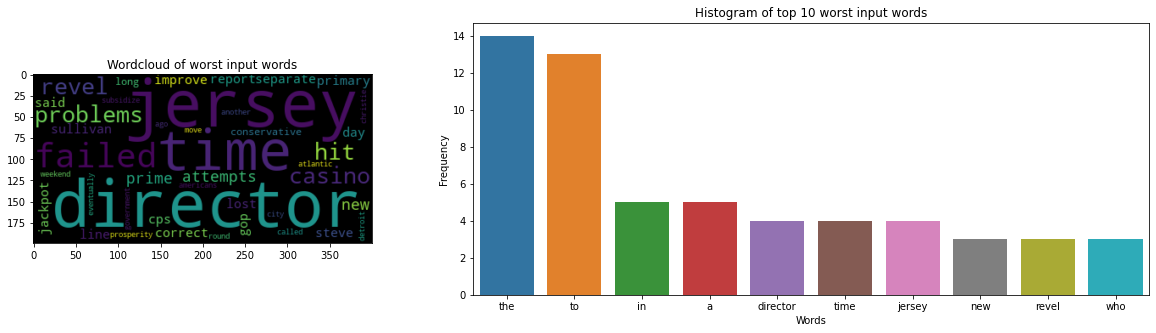

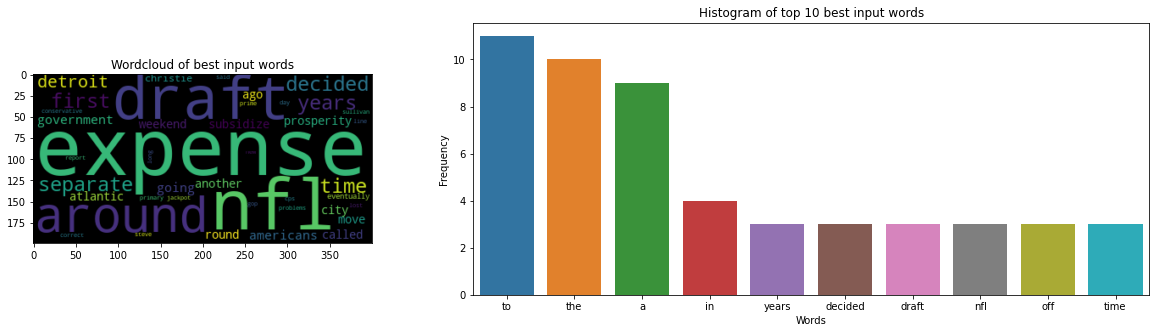

In [ ]:
eda_on_error(len4_error)

#### Error Analysis for 6-gram data points

In [ ]:
len7_x,len7_y=create_errordata(start,temp_length,7)
len7_error=error_analysis(model_len7,len7_x,len7_y,7)
del len7_x,len7_y
len7_error.head(50)

16395


x      error
74       hit the jackpot here at government  24.284920
82             time and again in the report  23.024176
85         in the report sullivan called on  19.203878
16            the draft from the weekend to  18.828316
86        the report sullivan called on cps  18.112316
87         report sullivan called on cps to  16.573584
91       cps to correct problems to improve  16.366970
54                new jersey director steve  16.324947
92  to correct problems to improve employee  15.863632
88        sullivan called on cps to correct  15.122622
19                the weekend to prime time  14.867706
52        americans for new jersey director  14.507524
59               a conservative who lost to  13.997763
6                  a few years ago when the  13.904685
43               line of failed attempts to  13.309862
26                 off the first round to a  13.199549
76   jackpot here at government expense but  12.977710
53                  for new jersey director  12.640488
18           from the weekend to prime time  12.206069
63             lost to christie in the 2009  11.824968
90            on cps to correct problems to  11.774128
68              2009 gop primary the casino  11.685465
64              to christie in the 2009 gop  11.446858
30                        to a separate day  11.393776
83         and again in the report sullivan  11.245334
45         failed attempts to atlantic city  11.136924
51            said americans for new jersey  11.052588
40                 in a long line of failed  10.860259
29                      round to a separate  10.403158
39                another in a long line of  10.367672
7                few years ago when the nfl  10.219308
28                first round to a separate  10.072506
70               primary the casino hit the   9.950661
71               the casino hit the jackpot   9.938140
14               to move the draft from the   9.782747
27            the first round to a separate   9.620270
11              the nfl decided to move the   8.666339
89        called on cps to correct problems   8.595947
78       at government expense but time and   8.547952
62              who lost to christie in the   8.543231
1                  amount of going around a   8.509818
20         weekend to prime time eventually   8.473894
73           casino hit the jackpot here at   8.305998
67                 the 2009 gop primary the   8.166757
79    government expense but time and again   7.727731
81                but time and again in the   7.381272
57        director steve a conservative who   7.335231
37               its just another in a long   7.333937
46           attempts to atlantic city said   7.308731
33                     day detroit its just   7.273715

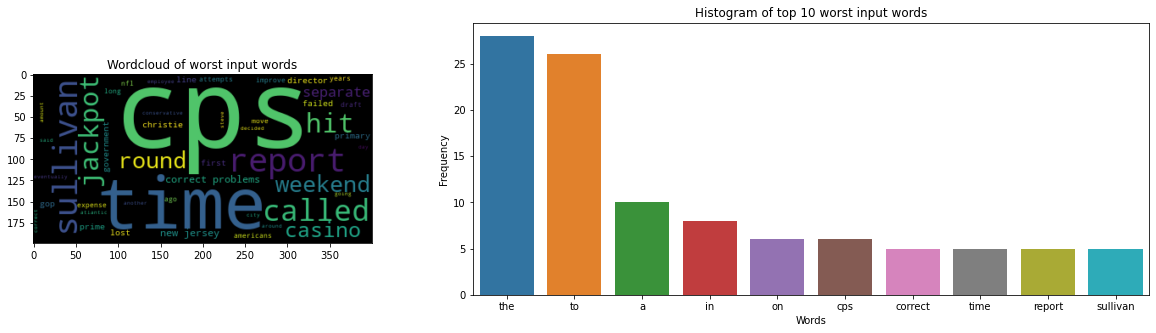

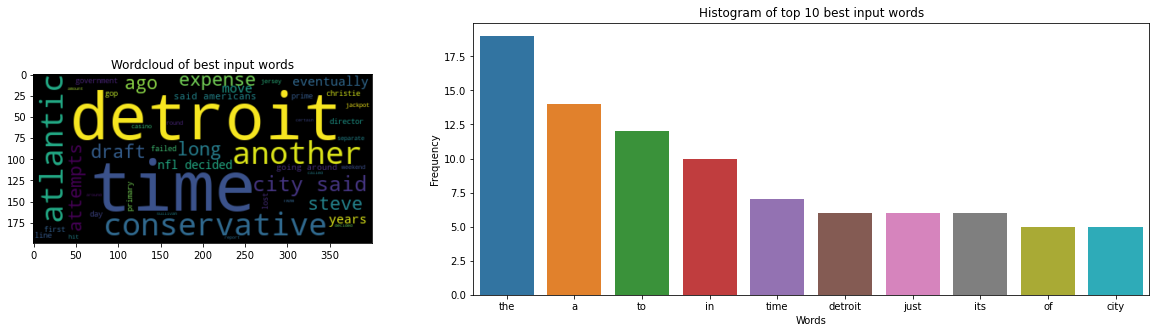

In [ ]:
eda_on_error(len7_error)

- From the EDA of the above 3 cases , I conclude that stopwords mainly overlap in best and worst prediction data points.The rest are distinct.

In [ ]:
del cleaned_corpus
del cleaned_text
del cleaned_twitter

### Predicting Next Word

In [ ]:
import re 
from nltk.tokenize import word_tokenize
def extra_space(text):
    new_text= re.sub("\s+"," ",text)
    return new_text
def sp_charac(text):
    new_text=re.sub("[^0-9A-Za-z ]", "" , text)
    return new_text
def tokenize_text(text):
    new_text=word_tokenize(text)
    return new_text

In [ ]:

def predict_next():
    import tensorflow as tf
    tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
    from tensorflow.keras.preprocessing.sequence import pad_sequences
    from tensorflow.keras.models import load_model
    from tensorflow.keras.optimizers import Adam
    import pickle
    import time
  
    with open('tokenizer_len7.pickle', 'rb') as handle:
        tokenizer_len7 = pickle.load(handle)

    with open('tokenizer_len4.pickle', 'rb') as handle:
        tokenizer_len4 = pickle.load(handle)
    with open('tokenizer_len2.pickle', 'rb') as handle:
        tokenizer_len2 = pickle.load(handle)
    
    file="lstmatt_len7.hdf5"
    model_len7 = load_model(file ,custom_objects={'attention': attention})
    model_len7.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])
    
    file="lstmatt_len4.hdf5"
    model_len4 = load_model(file, custom_objects={'attention': attention})
    model_len4.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

    file="lstmatt_len2.hdf5"
    model_len2 = load_model(file , custom_objects={'attention': attention})
    model_len2.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])
    while(True):
        text=input()
        start= time.time()
        cleaned_text=extra_space(text)
        cleaned_text=sp_charac(cleaned_text)
        tokenized=tokenize_text(cleaned_text)
    
        line = ' '.join(tokenized)
        
    
        if len(tokenized)==1:
        
            encoded_text = tokenizer_len2.texts_to_sequences([line])
            pad_encoded = pad_sequences(encoded_text, maxlen=1, truncating='pre')
    
            for i in (model_len2.predict(pad_encoded)[0]).argsort()[-3:][::-1]:
    
    
                pred_word = tokenizer_len2.index_word[i]
                print("Next word suggestion:",pred_word)
        elif len(tokenized)<4:
            encoded_text = tokenizer_len4.texts_to_sequences([line])
            pad_encoded = pad_sequences(encoded_text, maxlen=3, truncating='pre')
           
            for i in (model_len4.predict(pad_encoded)[0]).argsort()[-3:][::-1]:
    
    
                pred_word = tokenizer_len4.index_word[i]
                print("Next word suggestion:",pred_word)
        else:
            encoded_text = tokenizer_len7.texts_to_sequences([line])
            pad_encoded = pad_sequences(encoded_text, maxlen=6, truncating='pre')
    
            for i in (model_len7.predict(pad_encoded)[0]).argsort()[-3:][::-1]:
    
    
                pred_word = tokenizer_len7.index_word[i]
                print("Next word suggestion:",pred_word)
        print('Time taken: ',time.time()-start)
   

In [ ]:
predict_next()

what a lovely
Next word suggestion: water
Next word suggestion: air
Next word suggestion: man
Time taken:  1.0507631301879883
because there is no
Next word suggestion: heavy
Next word suggestion: towers
Next word suggestion: chance
Time taken:  1.575056791305542
maybe I should be
Next word suggestion: a
Next word suggestion: forced
Next word suggestion: charged
Time taken:  0.05898880958557129
very 
Next word suggestion: be
Next word suggestion: than
Next word suggestion: have
Time taken:  1.1010732650756836
in 
Next word suggestion: the
Next word suggestion: a
Next word suggestion: his
Time taken:  0.06171011924743652
There
Next word suggestion: and
Next word suggestion: was
Next word suggestion: said
Time taken:  0.08094501495361328


KeyboardInterrupt: Interrupted by user